# 404 Autoencoder


In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [3]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


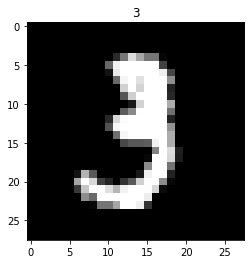

In [5]:
# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[10].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[10])
plt.show()

In [7]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [59]:

class ex(nn.Module):
    def __init__(self):
        super(ex,self).__init__()
        self.n = nn.Sequential(nn.Linear(8*4*4, 64),
                               nn.Linear(64, 128),
                               #nn.MaxUnpool2d(2)
                              )
        self.n2 = nn.MaxPool2d(2,stride=2,return_indices=True)
        self.n3 = nn.MaxUnpool2d(2,stride=2)
                                
    def forward(self,x):
        #x = x.view(-1, 128)
        #x = self.n(x)
        #x = x.view(8,4,4)
        x1,indices = self.n2(x)
        x2 = self.n3(x1,indices)
        return x1,x2

In [60]:
a = torch.ones(8,4,4)
print(a.shape)
net = ex()
a,b = net(a)
a.shape

torch.Size([8, 4, 4])


IndexError: tuple index out of range

In [23]:
class AutoEncoder1(nn.Module):
    def __init__(self):
        super(AutoEncoder1, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5,stride=1,padding=2), # output shape (16, 28, 28)
            nn.ReLU(inplace = True),                     
            nn.MaxPool2d(kernel_size=2),     # output shape (16, 14, 14)
            nn.Conv2d(16, 8, 5, 1, 2),       # output shape (8, 14, 14)
            nn.ReLU(inplace = True),       
            nn.MaxPool2d(2),                 # output shape (8, 7, 7)
            nn.Conv2d(8, 8, 5, 1, 2),        # output shape (8, 7, 7)
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2,ceil_mode = True),# output shape (8, 4, 4)
            nn.Linear(8*4*4, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.lin1 = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128)#128 = 8*4*4
        )         
        self.decoder= nn.Sequential(nn.MaxUnpool2d(2),          #8*7*7
                                    nn.ConvTranspose2d(in_channels=1
                                                     ,out_channels=1
                                                     ,kernel_size=2
                                                     ,stride=2
                                                     ,padding=1
                                                     ,output_padding=0
                                                     ,bias= False)
                                    nn.Sigmoid()       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        x = x.lin1(encoded)
        x = x.reshape(8,4,4)
        decoded = self.decoder(x)
        return encoded, decoded

In [64]:
class AutoEncoder2(nn.Module):
    def __init__(self):
        super(AutoEncoder2, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5,stride=1,padding=2), # output shape (16, 28, 28)
            nn.ReLU(inplace = True),                     
            nn.MaxPool2d(kernel_size=2),     # output shape (16, 14, 14)
            nn.Conv2d(16, 8, 5, 1, 2),       # output shape (8, 14, 14)
            nn.ReLU(inplace = True),       
            nn.MaxPool2d(2),                 # output shape (8, 7, 7)
            nn.Conv2d(8, 8, 5, 1, 2),        # output shape (8, 7, 7)
            nn.ReLU(inplace = True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),         #128 = 8*4*4
            nn.Tanh(),
            nn.Linear(128, 28*28),
            
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(1,28*28)
        return encoded, decoded

In [69]:
autoencoder = AutoEncoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)
#view_data = Variable(train_data.data[:N_TEST_IMG].type(torch.FloatTensor)/255.)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


Epoch:  0 | train loss: 0.0454


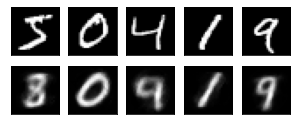

Epoch:  0 | train loss: 0.0421


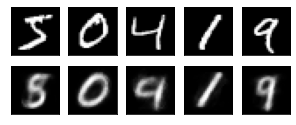

Epoch:  5 | train loss: 0.0406


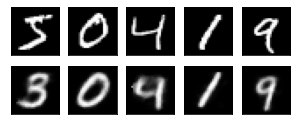

Epoch:  5 | train loss: 0.0358


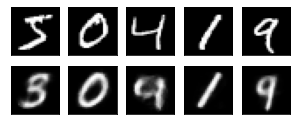

Epoch:  9 | train loss: 0.0368


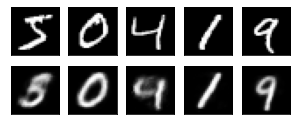

Epoch:  9 | train loss: 0.0380


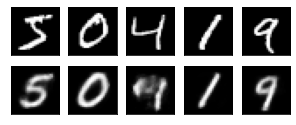

In [71]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        #b_x = Variable(x)
        #b_y = Variable(y)               # batch label
        #print(b_x)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients
        loss = loss.item()
        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss)

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); plt.pause(0.05)
            

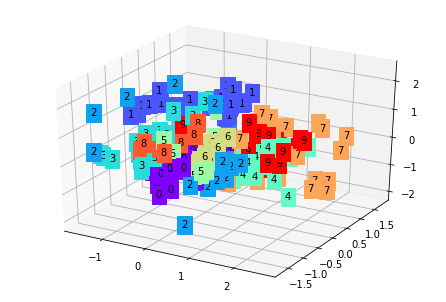

In [10]:
# visualize in 3D plot
view_data = Variable(train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.)
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()